In [2]:
import pandas as pd

# Read the csv files into pandas dataframes
edu_df = pd.read_csv('data/edu_sent_emo.csv')
he_df = pd.read_csv('data/he_sent_emo.csv')

# Combine the dataframes into one
combined_df = pd.concat([edu_df, he_df], ignore_index=True)

# Display the head of the combined dataframe
print(combined_df.head())


/var/folders/vz/xnvh56_d73j4fb9pp3_7c9k40000gn/T/ipykernel_36789/417748595.py:4: DtypeWarning: Columns (0,2,3,4,5,6,7,9,12,21,23,24,25,26,27,29,32,33,34,38,40,43,44,48,52,64,68,70,73,74,84,85,90,91,100,102,104,105,107,109,113,115,117,122,131,133,141,145,146,147,154,163,173,176,182,186,188,189,193,196) have mixed types. Specify dtype option on import or set low_memory=False.
  edu_df = pd.read_csv('data/edu_sent_emo.csv')


  archived_sub author_sub author_flair_background_color_sub  \
0          0.0     conuly                               NaN   
1          0.0     conuly                               NaN   
2          0.0     conuly                               NaN   
3          0.0     conuly                               NaN   
4          0.0     conuly                               NaN   

  author_flair_css_class_sub author_flair_richtext_sub author_flair_text_sub  \
0                        NaN                       NaN                   NaN   
1                        NaN                       NaN                   NaN   
2                        NaN                       NaN                   NaN   
3                        NaN                       NaN                   NaN   
4                        NaN                       NaN                   NaN   

  author_flair_text_color_sub author_flair_type_sub  brand_safe can_gild_sub  \
0                         NaN                   NaN         

/var/folders/vz/xnvh56_d73j4fb9pp3_7c9k40000gn/T/ipykernel_36789/417748595.py:5: DtypeWarning: Columns (5,12,25,38,48,61,67,69,70,99,104,105,113,115,117,122,123,124,141,150,153,156,181,191,192,199) have mixed types. Specify dtype option on import or set low_memory=False.
  he_df = pd.read_csv('data/he_sent_emo.csv')


In [3]:
# Write results to CSV
combined_df.to_csv('data/edu_he_merged.csv', index=False)

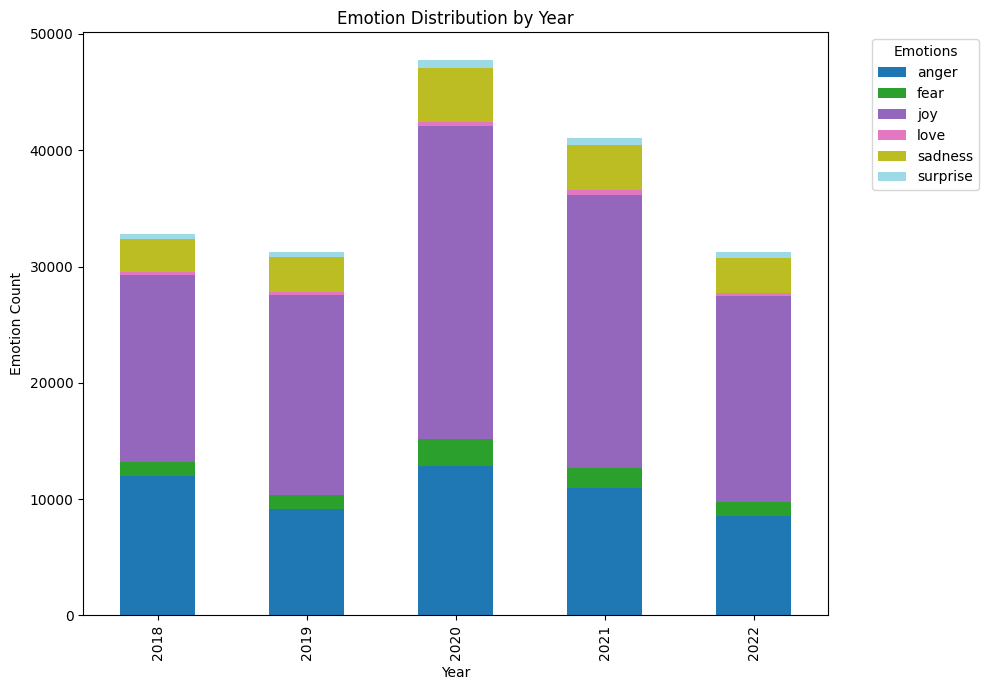

In [6]:
import matplotlib.pyplot as plt

# Drop rows with NA values in 'Year' column
combined_df = combined_df.dropna(subset=['Year'])

# Convert 'Year' to an integer to remove trailing decimals
combined_df['Year'] = combined_df['Year'].astype(int)

# Group by 'Year' and 'Emotions', then count the occurrences.
emotion_distribution = combined_df.groupby(['Year', 'Emotions'])['body'].count().unstack('Emotions', fill_value=0)

# Plotting the stacked bar chart
emotion_distribution.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='tab20')

# Adding the title and labels
plt.title('Emotion Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Emotion Count')

# Showing the legend
plt.legend(title='Emotions', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to make room for the legend
plt.tight_layout()

# Display the plot
plt.show()